In [1]:
import zipfile
import pandas as pd

# Specify the ZIP file path
zip_file_path = "/workspaces/Data-Science-Projects/CausalML/healthcareml/diabetes+130-us+hospitals+for+years+1999-2008.zip"

# Specify the target file you want to load
target_file = "diabetic_data.csv"

# Open the ZIP file and extract the target file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Check the list of files in the ZIP
    print("Files in ZIP:", zip_ref.namelist())
    
    # Extract and load the target file
    with zip_ref.open(target_file) as file:
        data = pd.read_csv(file)


Files in ZIP: ['diabetic_data.csv', 'IDS_mapping.csv']


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
df = data

In [6]:
print("Shape of the dataset :",df.shape)
print("No of observations in the dataset :",df.size)

Shape of the dataset : (101766, 50)
No of observations in the dataset : 5088300


In [9]:
print("THE NUMBER OF NUMERICAL COLUMNS ARE :",df.select_dtypes(include=np.number).shape[1])
print("THE NUMBER OF CATEGORICAL COLUMNS ARE :",df.select_dtypes(include="object").shape[1])

THE NUMBER OF NUMERICAL COLUMNS ARE : 13
THE NUMBER OF CATEGORICAL COLUMNS ARE : 37


In [10]:

print("DIFFERENT TYPE OF DATA-TYPES : \n",df.dtypes.value_counts())

DIFFERENT TYPE OF DATA-TYPES : 
 object    37
int64     13
Name: count, dtype: int64


In [11]:

df.describe(include="object")

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,5346,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,3,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,Norm,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,2597,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [12]:
df.describe(include=np.number)

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [20]:
missing_values=pd.DataFrame({"Missing_sum_of_values":df.isna().sum(),"Missing_%_of_vaues":(df.isna().sum()/len(df))*100})
missing_values

,Missing_sum_of_values,Missing_%_of_vaues
encounter_id,0,0.000000
patient_nbr,0,0.000000
race,0,0.000000
gender,0,0.000000
age,0,0.000000
weight,0,0.000000
admission_type_id,0,0.000000
discharge_disposition_id,0,0.000000
admission_source_id,0,0.000000
time_in_hospital,0,0.000000


In [21]:
target_value_distribution=pd.DataFrame({"Value_count":df.readmitted.value_counts(),"%_of_distribution":df.readmitted.value_counts(normalize=True)})
target_value_distribution     

,Value_count,%_of_distribution
readmitted,,
NO,54864,0.539119
>30,35545,0.349282
<30,11357,0.111599


In [27]:
df['max_glu_serum'].unique()

array([nan, '>300', 'Norm', '>200'], dtype=object)

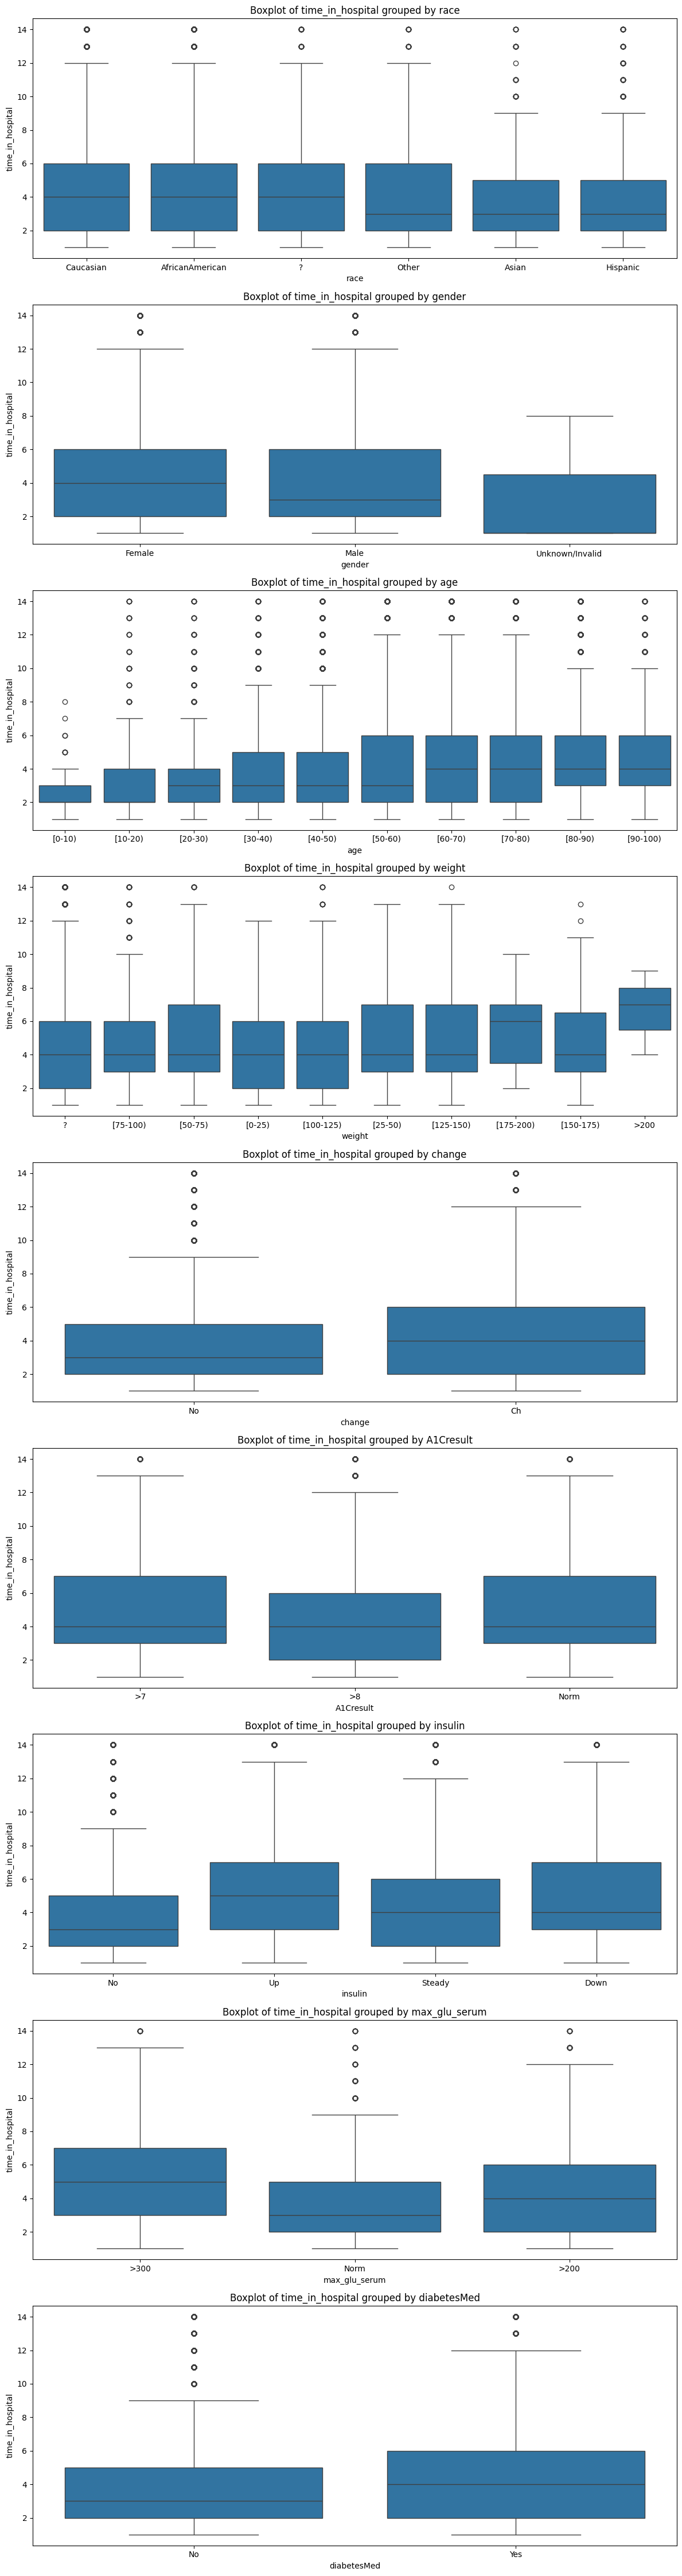

In [26]:
demographic_features = ['race', 'gender', 'age', 'weight', 'change', 'A1Cresult', 'insulin', 'max_glu_serum', 'diabetesMed']  # Replace with your demographic columns
value_column = 'time_in_hospital'  # Replace with your numerical column

# Number of subplots (1 row per demographic feature)
num_features = len(demographic_features)

# Set up the plotting grid
fig, axes = plt.subplots(nrows=num_features, figsize=(12, 5 * num_features))

# Create a boxplot for each demographic feature
for i, feature in enumerate(demographic_features):
    ax = axes[i] if num_features > 1 else axes  # Handle single subplot case
    sns.boxplot(x=feature, y=value_column, data=df, ax=ax)
    ax.set_title(f'Boxplot of {value_column} grouped by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel(value_column)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [6]:

selected_columns = ['race', 'gender', 'age', 'admission_type_id', 
                    'time_in_hospital', 'num_lab_procedures', 
                    'num_medications', 'number_diagnoses', 
                    'change', 'diabetesMed', 'readmitted']
# Focus on selected features
data = data[selected_columns]

# Remove rows with invalid or unknown values
data = data[~data['race'].isin(['?'])]
data = data[~data['gender'].isin(['Unknown/Invalid'])]

# Binary encoding for treatment and outcome
data['diabetesMed_binary'] = (data['diabetesMed'] == 'Yes').astype(int)
data['readmitted_binary'] = (data['readmitted'] != 'NO').astype(int)

# Encode categorical variables using one-hot encoding
categorical_columns = ['gender', 'race', 'age', 'admission_type_id', 
                       'time_in_hospital', 'num_lab_procedures', 
                       'num_medications', 'number_diagnoses', 'change']

# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, 
                               columns=categorical_columns, 
                               drop_first=True)

data_encoded.head()

,diabetesMed,readmitted,diabetesMed_binary,readmitted_binary,gender_Male,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_[10-20),...,number_diagnoses_8,number_diagnoses_9,number_diagnoses_10,number_diagnoses_11,number_diagnoses_12,number_diagnoses_13,number_diagnoses_14,number_diagnoses_15,number_diagnoses_16,change_No
0,No,NO,0,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,Yes,>30,1,1,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,False,False
2,Yes,NO,1,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,Yes,NO,1,0,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Yes,NO,1,0,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data_encoded = data_encoded.drop(["diabetesMed", "readmitted"], axis=1)

In [8]:
data_encoded.columns

Index(['diabetesMed_binary', 'readmitted_binary', 'gender_Male', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'age_[10-20)',
       'age_[20-30)', 'age_[30-40)',
       ...
       'number_diagnoses_8', 'number_diagnoses_9', 'number_diagnoses_10',
       'number_diagnoses_11', 'number_diagnoses_12', 'number_diagnoses_13',
       'number_diagnoses_14', 'number_diagnoses_15', 'number_diagnoses_16',
       'change_No'],
      dtype='object', length=243)

## Specifying CausalModel without specifying DAG

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


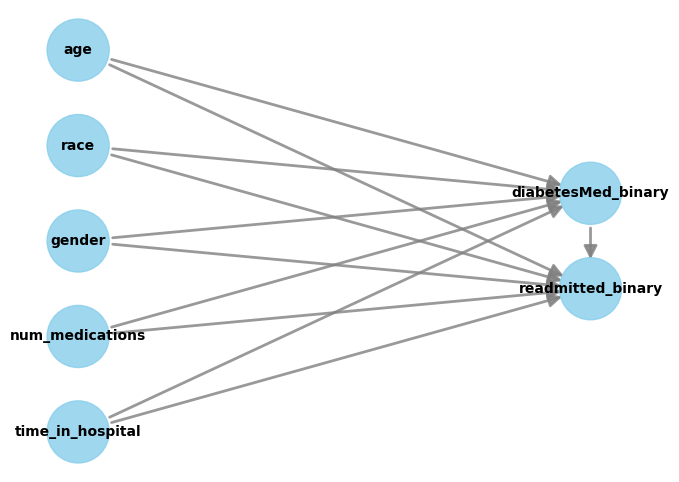

In [9]:
from dowhy import CausalModel

# Define the dataset structure
model = CausalModel(
    data=data,
    treatment="diabetesMed_binary",  # Whether diabetes medication was prescribed
    outcome="readmitted_binary",     # Outcome: Readmission status
    common_causes=["age", "race", "gender", "num_medications", "time_in_hospital"]
)

# Visualize the DAG
model.view_model()


### Identifying the causal effect to be estimated 
[Understanding Estimands](README.md#Estimands)



In [10]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                                                   
─────────────────────(E[readmitted_binary|age,race,num_medications,gender,time
d[diabetesMed_binary]                                                         

              
_in_hospital])
              
Estimand assumption 1, Unconfoundedness: If U→{diabetesMed_binary} and U→readmitted_binary then P(readmitted_binary|diabetesMed_binary,age,race,num_medications,gender,time_in_hospital,U) = P(readmitted_binary|diabetesMed_binary,age,race,num_medications,gender,time_in_hospital)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



### Estimation of Causal Effect
[Estimating Causal Effects](README.md#CausalEffectsEstimation)

In [ ]:
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_matching"
)
print(f"Causal Effect Estimate: {estimate.value}")

Causal Effect Estimate: 0.06617617496884172


### Refutation
[Refutation in Causal Inference](README.md#Refutation)

In [11]:
# Refute the estimate
refutation = model.refute_estimate(
    identified_estimand, estimate, method_name="placebo_treatment_refuter"
)
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:0.060175692517991396
New effect:0.00017619507096047906
p value:0.94



## Model Comparison

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Split data
X = data_encoded.drop(columns=['readmitted_binary'])
y = data['readmitted_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.5552540328659732
F1 Score: 0.4785529106764082


#### Using Linear Regression on the Causal Model

In [13]:
# Estimate using linear regression
estimate_lr = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)
print(f"Linear Regression Estimate: {estimate_lr.value}")


Linear Regression Estimate: 0.06880874866015574


/usr/local/python/3.12.1/lib/python3.12/site-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [14]:
# Estimate using inverse propensity weighting
estimate_ipw = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_weighting"
)
print(f"Inverse Propensity Weighting Estimate: {estimate_ipw.value}")


Inverse Propensity Weighting Estimate: 0.06254068434236254


In [15]:
# Summarize results
print(f"Propensity Score Matching Estimate: {estimate.value}")
print(f"Linear Regression Estimate: {estimate_lr.value}")
print(f"Inverse Propensity Weighting Estimate: {estimate_ipw.value}")


Propensity Score Matching Estimate: 0.06617617496884172
Linear Regression Estimate: 0.06880874866015574
Inverse Propensity Weighting Estimate: 0.06254068434236254
